<div style="background-color: #f7efe8; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <div style="color: #282828; font-size: 24px; font-weight: bold;">
        Welcome to My Kaggle Notebook! 🎉
    </div>


<div style="color: #fc6454; font-size: 20px;">
    I'm new to the world of machine learning. 🌟
</div>

<div style="color: #b7f4d8; font-size: 20px;">
    If you have any suggestions, please let me know. 🤔
</div>

<div style="color: #f3e16b; font-size: 20px;">
    Apologies in advance for any goof-ups! 😅
</div>

<div style="color: #f7efe8; font-size: 20px;">
    Let's learn together and have fun! 🎉
</div>

</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


### **1. Importing The Libraries**

In [2]:
# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# To preprocess the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier


# machine learning
from sklearn.model_selection import train_test_split

#Model
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Evaluation
from sklearn.metrics import roc_auc_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the Dataset


In [3]:
# Load Submission Data 
df_submission = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv', index_col='id')
# Load test Data 
df_test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv', index_col='id')
# Load Train Dataset and show head of Data 
#Train Data 
df_train = pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv', index_col='id')

In [4]:
# making a Copy of the Test Data for Future Use 
df_test = pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv', index_col='id')
df_test_ov = df_test.copy()
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [5]:
df_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [6]:
df_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,,,,,,
11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [7]:
df_submission.head()

,Response
id,
11504798,0.5
11504799,0.5
11504800,0.5
11504801,0.5
11504802,0.5


### **3. Exploring the Train Dataset**

In [8]:
# Checking the number of rows and columns

num_train_rows, num_train_columns = df_train.shape

num_test_rows, num_test_columns = df_test.shape

num_submission_rows, num_submission_columns = df_submission.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Submission Data:")
print(f"Number of Rows: {num_submission_rows}")
print(f"Number of Columns: {num_submission_columns}")

Training Data:
Number of Rows: 11504798
Number of Columns: 11

Test Data:
Number of Rows: 7669866
Number of Columns: 10

Submission Data:
Number of Rows: 7669866
Number of Columns: 1


In [9]:
# Null Values in Train 
train_null = df_train.isnull().sum().sum()

#Null Count in Test 
test_null = df_test.isnull().sum().sum()

#null Count in Submission
submission_null = df_submission.isnull().sum()

print(f'Null Count in Train: {train_null}')
print(f'Null Count in Test: {test_null}')
print(f'Null Count in Submission: {submission_null}')

Null Count in Train: 0
Null Count in Test: 0
Null Count in Submission: Response    0
dtype: int64


In [10]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Count duplicate rows in test_data
test_duplicates = df_test.duplicated().sum()

# Count duplicate rows in original_data
submission_duplicates = df_submission.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")
print(f"Number of duplicate rows in test_data: {test_duplicates}")
print(f"Number of duplicate rows in test_data: {submission_duplicates}")

Number of duplicate rows in train_data: 0
Number of duplicate rows in test_data: 0
Number of duplicate rows in test_data: 7669865


In [11]:
# Count number of unique values in train_data
train_unique = df_train.nunique()

print(f"Number of duplicate rows in train_data: {train_unique}")

Number of duplicate rows in train_data: Gender                      2
Age                        66
Driving_License             2
Region_Code                54
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          51728
Policy_Sales_Channel      152
Vintage                   290
Response                    2
dtype: int64


In [12]:
# Count number of unique values test_data
test_unique = df_test.nunique()

print(f"Number of duplicate rows in test_data: {test_unique}")

Number of duplicate rows in test_data: Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          50044
Policy_Sales_Channel      151
Vintage                   290
dtype: int64


In [13]:
# Checking the number of rows and columns
num_train_rows, num_train_columns = df_train.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Training Data:
Number of Rows: 11504798
Number of Columns: 11



In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


#### Observation

* There are 11504798 rows and 11 columns in the dataset.
* The columns having float datatypes are 3, integer datatype 5, object datatype are 3
* The data does not contain any missing values
* The target variable in the dataset is Response.

In [15]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11504798.0,38.383563,14.993459,20.0,24.0,36.0,49.0,85.0
Driving_License,11504798.0,0.998022,0.044431,0.0,1.0,1.0,1.0,1.0
Region_Code,11504798.0,26.418690,12.991590,0.0,15.0,28.0,35.0,52.0
Previously_Insured,11504798.0,0.462997,0.498629,0.0,0.0,0.0,1.0,1.0
Annual_Premium,11504798.0,30461.370411,16454.745205,2630.0,25277.0,31824.0,39451.0,540165.0
Policy_Sales_Channel,11504798.0,112.425442,54.035708,1.0,29.0,151.0,152.0,163.0
Vintage,11504798.0,163.897744,79.979531,10.0,99.0,166.0,232.0,299.0
Response,11504798.0,0.122997,0.328434,0.0,0.0,0.0,0.0,1.0


In [16]:
# Null Values in Train 
train_null = df_train.isnull().sum()
print(f'Null Count in Train: {train_null}')

Null Count in Train: Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [17]:
# Count duplicate rows in train_data
train_duplicates = df_train.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in train_data: {train_duplicates}")

Number of duplicate rows in train_data: 0


### **4. Lets Visualize the data**

In [18]:
palette = sns.color_palette("Set2")

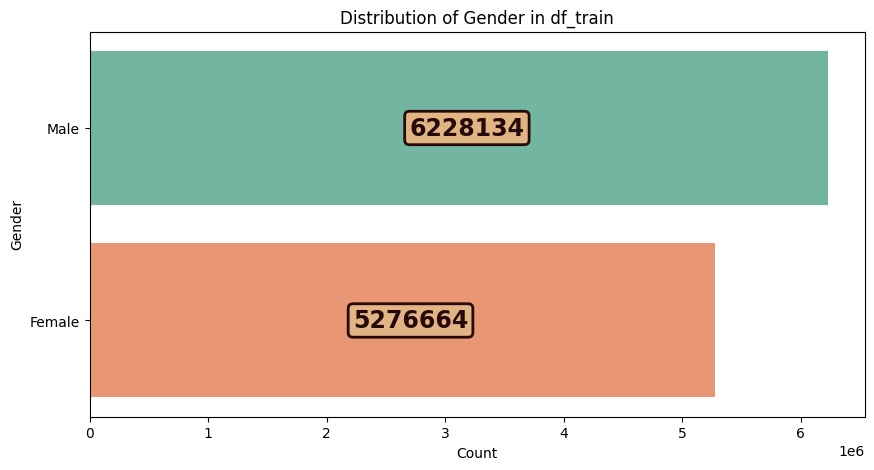

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Gender", data=df_train, palette=palette, ax=ax)

for container in p.containers:
    p.bar_label(container, fmt='%d', label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

ax.set_title("Distribution of Gender in df_train")
ax.set_xlabel("Count")
ax.set_ylabel("Gender")

plt.show()

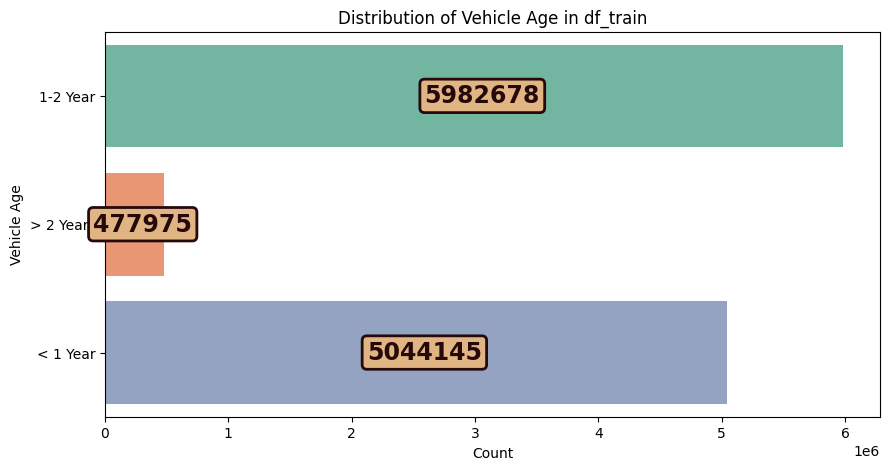

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Vehicle_Age", data=df_train, palette=palette, ax=ax)

for container in p.containers:
    p.bar_label(container, fmt='%d', label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

ax.set_title("Distribution of Vehicle Age in df_train")
ax.set_xlabel("Count")
ax.set_ylabel("Vehicle Age")

plt.show()

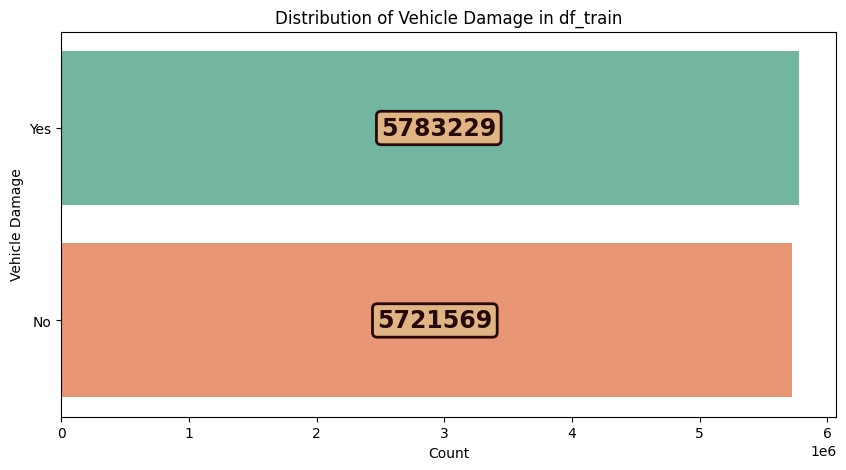

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Vehicle_Damage", data=df_train, palette=palette, ax=ax)

for container in p.containers:
    p.bar_label(container, fmt='%d', label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

ax.set_title("Distribution of Vehicle Damage in df_train")
ax.set_xlabel("Count")
ax.set_ylabel("Vehicle Damage")

plt.show()

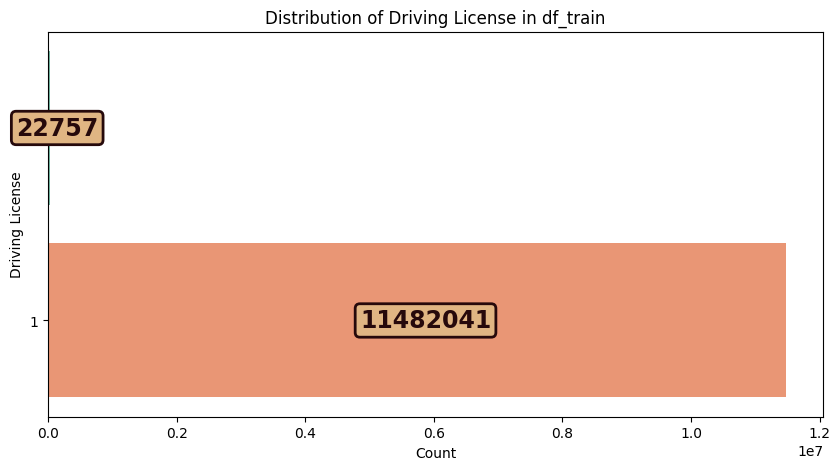

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Driving_License", data=df_train, palette=palette, ax=ax)

for container in p.containers:
    p.bar_label(container, fmt='%d', label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

ax.set_title("Distribution of Driving License in df_train")
ax.set_xlabel("Count")
ax.set_ylabel("Driving License")

plt.show()

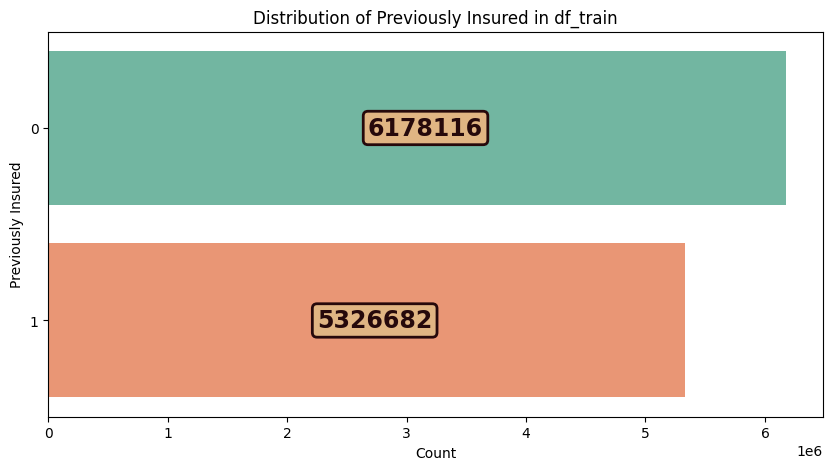

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
p = sns.countplot(y="Previously_Insured", data=df_train, palette=palette, ax=ax)

for container in p.containers:
    p.bar_label(container, fmt='%d', label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, 
                bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

ax.set_title("Distribution of Previously Insured in df_train")
ax.set_xlabel("Count")
ax.set_ylabel("Previously Insured")

plt.show()

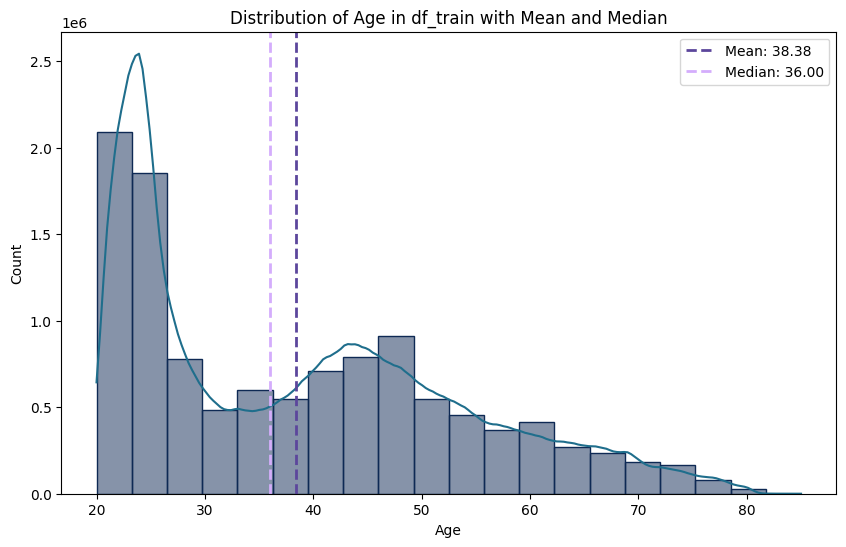

In [24]:
fig = plt.figure(figsize=(10, 6))

histplot = sns.histplot(data=df_train, x="Age", bins=20, color='#0E2954', edgecolor='#0E2954', kde=True)

histplot.get_lines()[0].set_color('#1F6E8C')

mean_value = df_train["Age"].mean()
median_value = df_train["Age"].median()

plt.axvline(mean_value, color='#5C469C', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='#D4ADFC', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.title("Distribution of Age in df_train with Mean and Median")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

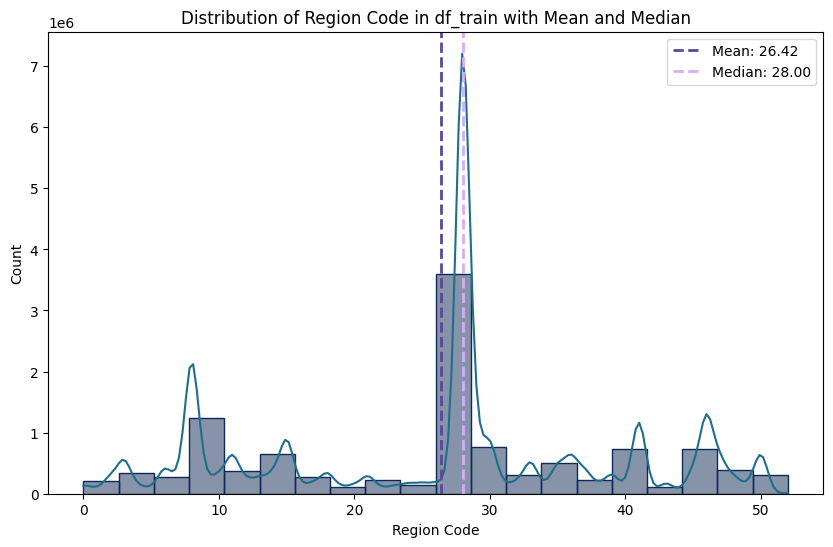

In [25]:
fig = plt.figure(figsize=(10, 6))

histplot = sns.histplot(data=df_train, x="Region_Code", bins=20, color='#0E2954', edgecolor='#0E2954', kde=True)

histplot.get_lines()[0].set_color('#1F6E8C')

mean_value = df_train["Region_Code"].mean()
median_value = df_train["Region_Code"].median()

plt.axvline(mean_value, color='#5C469C', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='#D4ADFC', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

plt.title("Distribution of Region Code in df_train with Mean and Median")
plt.xlabel("Region Code")
plt.ylabel("Count")
plt.legend()
plt.show()

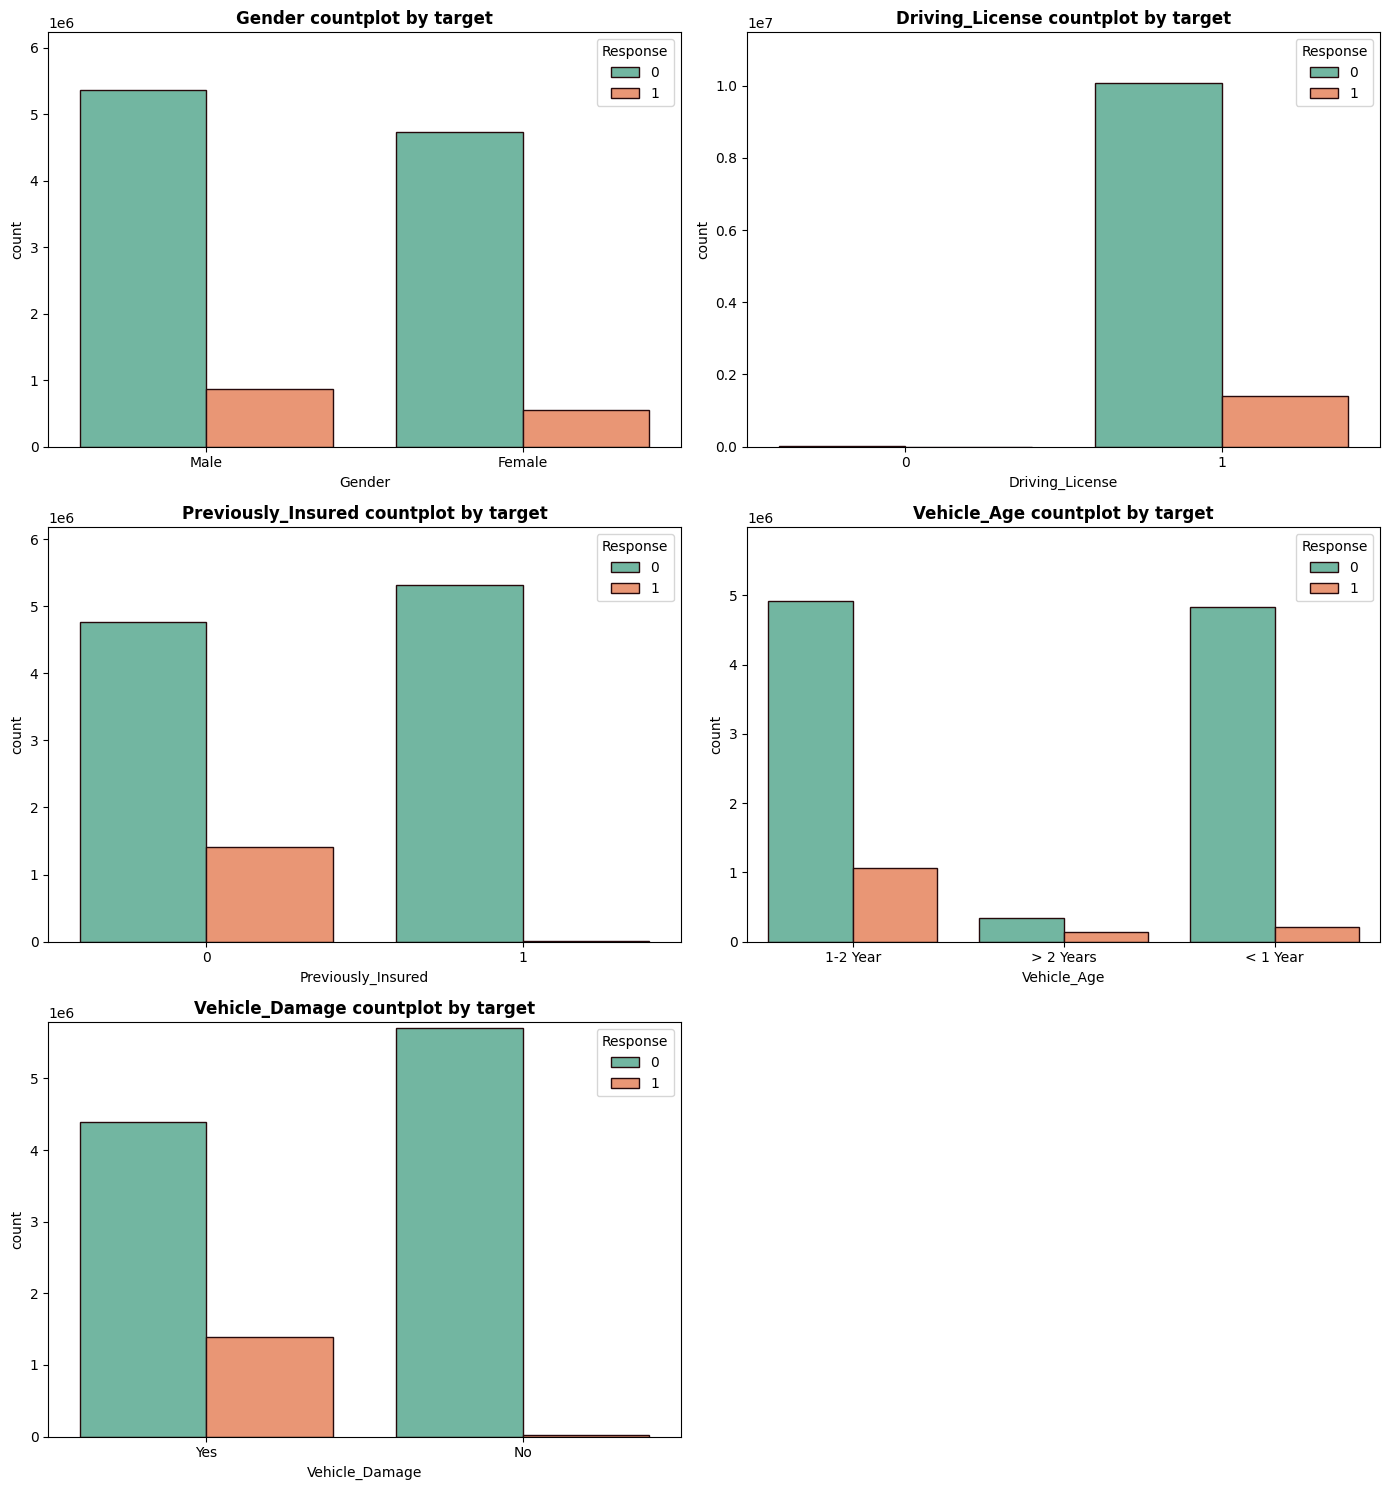

In [26]:
cat_cols = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

num_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

target = 'Response'

fig = plt.figure(figsize=(14, len(cat_cols)*3))

for i, col in enumerate(cat_cols):
    
    plt.subplot(len(cat_cols)//2 + len(cat_cols) % 2, 2, i+1)
    sns.countplot(x=col, hue=target, data=df_train, palette=palette[0:2], color='#26090b', edgecolor='#26090b')
    plt.title(f"{col} countplot by target", fontweight = 'bold')
    plt.ylim(0, df_train[col].value_counts().max() + 10)
    
plt.tight_layout()
plt.show()

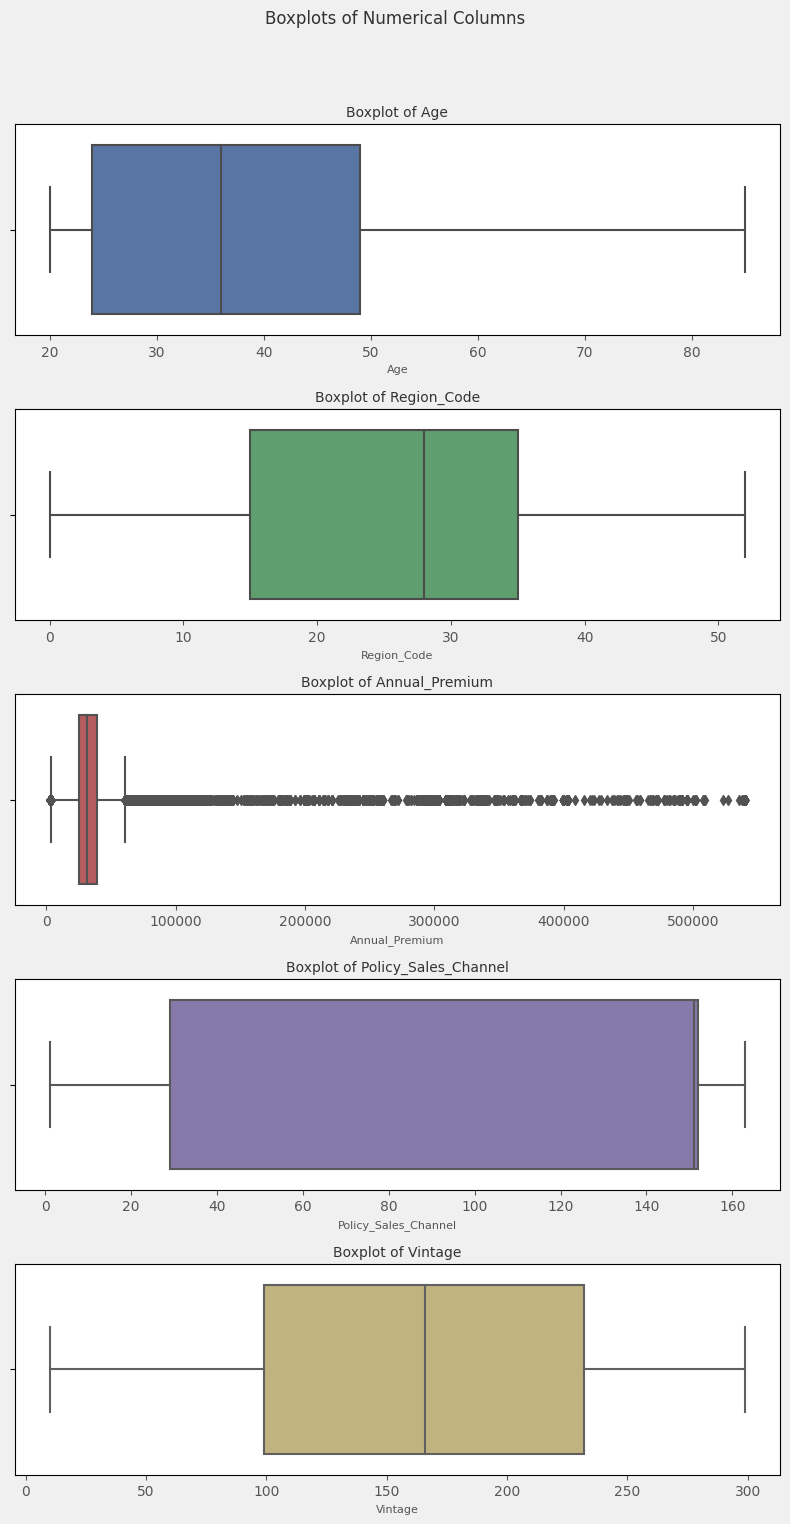

In [27]:
num_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 16))

fig.patch.set_facecolor('#F0F0F0')
for ax in axes:
    ax.set_facecolor('#FFFFFF')

custom_palette = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

for i, col in enumerate(num_cols):
    sns.boxplot(x=df_train[col], ax=axes[i], color=custom_palette[i], linewidth=1.5)
    axes[i].set_title(f'Boxplot of {col}', fontsize=10, color='#333333')
    axes[i].set_xlabel(col, fontsize=8, color='#555555')
    axes[i].tick_params(axis='x', colors='#555555')

plt.suptitle("Boxplots of Numerical Columns", fontsize=12, color='#333333')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

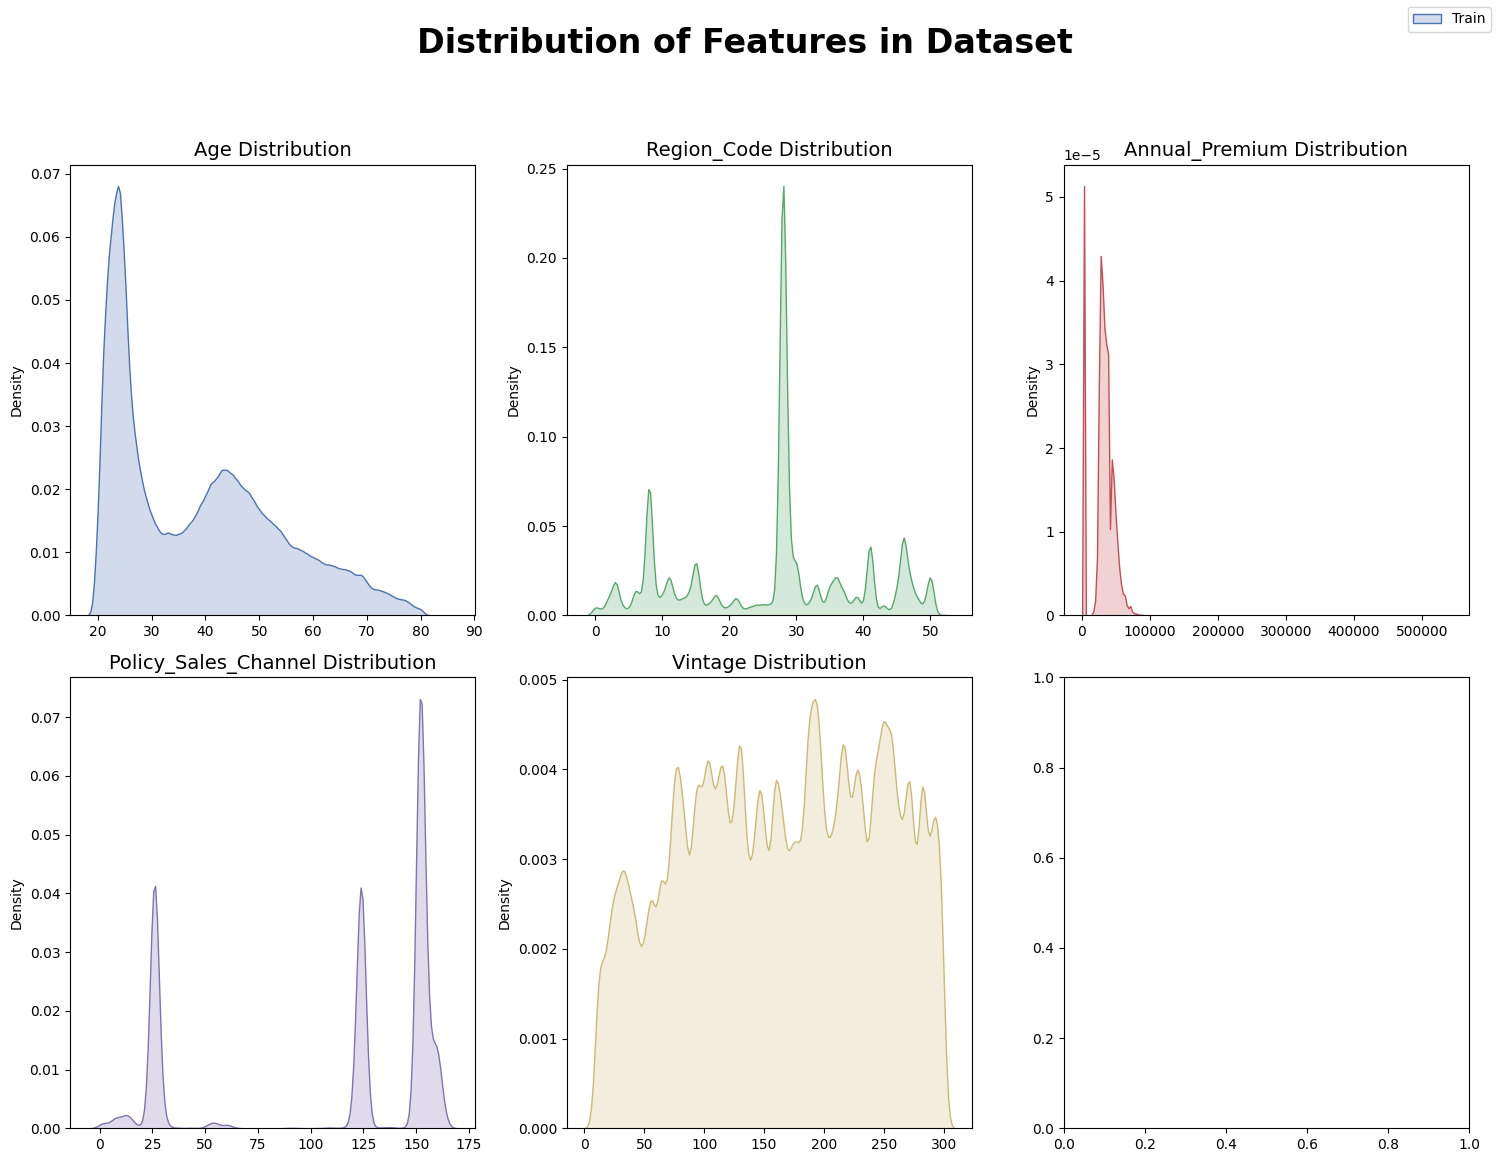

In [28]:
# Define a color palette
palette = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974']

# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 12), dpi=100)
ax = ax.flatten()

# Numerical columns
num_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Plot KDE plots for each numerical column
for i, column in enumerate(num_cols):
    sns.kdeplot(df_train[column], ax=ax[i], color=palette[i % len(palette)], shade=True)
    ax[i].set_title(f'{column} Distribution', size=14)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Density')

# Adjust layout and add main title
fig.suptitle('Distribution of Features in Dataset', fontsize=24, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust suptitle position

# Add legend outside the subplots
fig.legend(labels=['Train'], loc='upper right')

plt.show()

### **5. Preprocess Data**

In [29]:
X_train = df_train.drop(columns='Response')
y_train = df_train['Response']
X_test = df_test

In [30]:
# Define numerical and categorical features
numerical_features_standard = ['Age', 'Annual_Premium', 'Vintage']
numerical_features_minmax = ['Region_Code', 'Policy_Sales_Channel']
categorical_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_standard', StandardScaler(), numerical_features_standard),
        ('num_minmax', MinMaxScaler(), numerical_features_minmax),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [32]:
catboost = CatBoostClassifier(verbose=0, random_state=42)

In [33]:
lightgbm = LGBMClassifier(random_state=42)

In [34]:
xgboost = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [35]:
# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('catboost', catboost), ('lightgbm', lightgbm), ('xgboost', xgboost)], 
    voting='soft')

In [36]:
# Create a pipeline that combines the preprocessor and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', voting_clf)])

# Train the model
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1415059, number of negative: 10089739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.897263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 11504798, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122997 -> initscore=-1.964348
[LightGBM] [Info] Start training from score -1.964348


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_standard',
                                                  StandardScaler(),
                                                  ['Age', 'Annual_Premium',
                                                   'Vintage']),
                                                 ('num_minmax', MinMaxScaler(),
                                                  ['Region_Code',
                                                   'Policy_Sales_Channel']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Driving_License',
                                                   'Previously_Insured',
                                                   'Vehicle_Age',
                                                   'Vehicle_Damage'])])),
                ('classifier',
                 Vot...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...))],
                                  voting='soft'))])

In [37]:
y_pred = pipeline.predict(X_test)

In [38]:
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [39]:
df_submission = pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')
df_submission['Response'] = y_pred_proba
df_submission.to_csv('score.csv', index=False)

In [40]:
y_pred_proba

array([9.41366516e-03, 4.57179571e-01, 2.45586150e-01, ...,
       3.24313360e-04, 5.57561546e-01, 1.36931054e-04])